[10387 - Scientific Computing in Quantum Information Science](https://kurser.dtu.dk/course/10387)

# Working with arrays

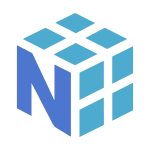

Most scientific computational work in Python relies on NumPy.

> NumPy (pronounced /ˈnʌmpaɪ/ NUM-py) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

> NumPy targets the CPython reference implementation of Python, which is a non-optimizing bytecode interpreter. Mathematical algorithms written for this version of Python often run much slower than compiled equivalents due to the absence of compiler optimization. NumPy addresses the slowness problem partly by providing multidimensional arrays and functions and operators that operate efficiently on arrays.

> Internally, both MATLAB and NumPy rely on BLAS and LAPACK for efficient linear algebra computations.

> The core functionality of NumPy is its "ndarray", for n-dimensional array, data structure. These arrays are strided views on memory. In contrast to Python's built-in list data structure, these arrays are homogeneously typed: all elements of a single array must be of the same type.

[source: Wikipedia](https://www.wikiwand.com/en/NumPy)

In [ ]:
import numpy as np

## Arrays vs. lists

In [172]:
L = list(range(5))
A = np.arange(5)
type(L), type(A)

(list, numpy.ndarray)

In [173]:
from sys import getsizeof
getsizeof(L)

104

In [176]:
type(A[0])

numpy.int64

In [177]:
getsizeof(A)

152

In [178]:
2*L

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

In [179]:
2*A

array([0, 2, 4, 6, 8])

In [181]:
L**2 - 1

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [182]:
[l**2 - 1 for l in L]

[-1, 0, 3, 8, 15]

In [184]:
A**2 - 1

array([-1,  0,  3,  8, 15])

### Speed

In [185]:
%timeit [l**2 - 1 for l in L]
%timeit A**2 - 1

184 ns ± 1.79 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
1.1 μs ± 13.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [186]:
L = list(range(1000_000))
A = np.arange(1000_000.)
%timeit [l**2 - 1 for l in L]
%timeit A**2 - 1

54.4 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.88 ms ± 159 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [187]:
%timeit [np.sin(l) for l in L]
%timeit np.sin(A)

800 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.96 ms ± 56.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Only one data type

[Data types — NumPy v2.0 Manual](https://numpy.org/doc/stable/user/basics.types.html)

In [188]:
L = [1, 1., 'one', True, np.array(1)]
[type(l) for l in L]

[int, float, str, bool, numpy.ndarray]

In [189]:
[2*l for l in L]

[2, 2.0, 'oneone', 2, 2]

In [190]:
A = np.array(L)
A

array(['1', '1.0', 'one', 'True', '1'], dtype='<U32')

In [191]:
2*A

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('int64'), dtype('<U32')) -> None

In [192]:
[2*a for a in A]

['11', '1.01.0', 'oneone', 'TrueTrue', '11']

In [195]:
A.dtype

dtype('<U32')

In [199]:
B = np.arange(4)*1j
C = np.arange(4.)
(B+C).dtype

dtype('complex128')

In [200]:
Aint = np.arange(5)
Afloat = np.arange(5.)
Acomplex = np.arange(5.).astype(complex)

In [201]:
Aint, Afloat, Acomplex

(array([0, 1, 2, 3, 4]),
 array([0., 1., 2., 3., 4.]),
 array([0.+0.j, 1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j]))

In [202]:
Aint.dtype, Afloat.dtype, Acomplex.dtype

(dtype('int64'), dtype('float64'), dtype('complex128'))

In [203]:
(125 + Aint).astype(np.int8)

array([ 125,  126,  127, -128, -127], dtype=int8)

In [204]:
Aint + Afloat

array([0., 2., 4., 6., 8.])

In [205]:
Afloat + Acomplex

array([0.+0.j, 2.+0.j, 4.+0.j, 6.+0.j, 8.+0.j])

In [206]:
Afloat + .8, \
(Afloat + .8).astype(int)

(array([0.8, 1.8, 2.8, 3.8, 4.8]), array([0, 1, 2, 3, 4]))

In [208]:
Acomplex + 1j, \
(Acomplex + 1j).astype(int)

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_260/1686574025.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  (Acomplex + 1j).astype(int)


(array([0.+1.j, 1.+1.j, 2.+1.j, 3.+1.j, 4.+1.j]), array([0, 1, 2, 3, 4]))

### Fixed size

In [209]:
L = []
L.append(3)
L

[3]

In [210]:
A = np.array([])
A.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [213]:
A = np.append(A, 3)

In [214]:
A

array([3.])

In [216]:
np.insert(A, 0,5)

array([5., 3.])

In [217]:
A

array([3.])

In [218]:
np.array([[1,2,3], [4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [219]:
np.array([[1,2], [4,5,6]])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

### Enhanced indexing

In [220]:
L = [[i + 10*j for j in range(10)] for i in range(5)]
L

[[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
 [2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
 [3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
 [4, 14, 24, 34, 44, 54, 64, 74, 84, 94]]

In [225]:
L[2:4,:2]

TypeError: list indices must be integers or slices, not tuple

In [226]:
A = np.array(L)
A[2:4, :4]

array([[ 2, 12, 22, 32],
       [ 3, 13, 23, 33]])

## Array indexing

[Indexing on ndarrays — NumPy v2.0 Manual](https://numpy.org/doc/stable/user/basics.indexing.html)

[Indexing routines — NumPy v2.0 Manual](https://numpy.org/doc/stable/reference/routines.indexing.html#)

In [227]:
A = np.arange(1,25).reshape(4,6)
A

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [228]:
A[2]

array([13, 14, 15, 16, 17, 18])

In [230]:
A[:,2].shape

(4,)

In [231]:
A[0,3:]

array([4, 5, 6])

In [232]:
A[0,-2:]

array([5, 6])

In [233]:
A[0,1::2]

array([2, 4, 6])

In [236]:
A[0,::-2]

array([6, 4, 2])

In [241]:
test_ix = (A>8) & (A<=16)
test_ix

array([[False, False, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [ True,  True,  True,  True, False, False],
       [False, False, False, False, False, False]])

In [243]:
A[test_ix].sum()

100

In [245]:
np.sqrt(A)[test_ix]

array([3.        , 3.16227766, 3.31662479, 3.46410162, 3.60555128,
       3.74165739, 3.87298335, 4.        ])

In [246]:
B = A.reshape(4,2,3)
B

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24]]])

In [250]:
B[0, ...,0]

array([1, 4])

In [251]:
B[..., 0]

array([[ 1,  4],
       [ 7, 10],
       [13, 16],
       [19, 22]])

In [252]:
A

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [253]:
A.shape

(4, 6)

In [254]:
A[:,None,:].shape  # equivalent to A[:,:,np.newaxis]

(4, 1, 6)

In [256]:
A[:,None,:]

array([[[ 1,  2,  3,  4,  5,  6]],

       [[ 7,  8,  9, 10, 11, 12]],

       [[13, 14, 15, 16, 17, 18]],

       [[19, 20, 21, 22, 23, 24]]])

In [264]:
l = [[1,3],[0,2,5]]

In [265]:
A[*l]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

In [259]:
ix = np.ix_([1,3], [0,2,5])
ix

(array([[1],
        [3]]),
 array([[0, 2, 5]]))

In [260]:
A[ix]

array([[ 7,  9, 12],
       [19, 21, 24]])

In [279]:
U

array([[1.],
       [3.]])

In [280]:
X

array([[1., 1., 1., 1., 1., 1.],
       [3., 3., 3., 3., 3., 3.]])

In [278]:
getsizeof(U), getsizeof(X)

(128, 128)

In [275]:
U, V = np.ogrid[1:3:2j,0:4:6j]

In [281]:
X,Y = np.mgrid[1:3:2j,0:4:6j]
np.mgrid[1:3:2j,0:4:6j]

array([[[1. , 1. , 1. , 1. , 1. , 1. ],
        [3. , 3. , 3. , 3. , 3. , 3. ]],

       [[0. , 0.8, 1.6, 2.4, 3.2, 4. ],
        [0. , 0.8, 1.6, 2.4, 3.2, 4. ]]])

In [327]:
np.meshgrid([1,3],np.linspace(0,4,6), indexing='ij')

[array([[1, 1, 1, 1, 1, 1],
        [3, 3, 3, 3, 3, 3]]),
 array([[0. , 0.8, 1.6, 2.4, 3.2, 4. ],
        [0. , 0.8, 1.6, 2.4, 3.2, 4. ]])]

In [328]:
np.meshgrid([1,3],np.linspace(0,4,6), indexing='xy')

[array([[1, 3],
        [1, 3],
        [1, 3],
        [1, 3],
        [1, 3],
        [1, 3]]),
 array([[0. , 0. ],
        [0.8, 0.8],
        [1.6, 1.6],
        [2.4, 2.4],
        [3.2, 3.2],
        [4. , 4. ]])]

In [273]:
def func(x,y):
    return x+y

In [277]:
func(U,V)

array([[1. , 1.8, 2.6, 3.4, 4.2, 5. ],
       [3. , 3.8, 4.6, 5.4, 6.2, 7. ]])

In [282]:
A[2] = 0
A

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [ 0,  0,  0,  0,  0,  0],
       [19, 20, 21, 22, 23, 24]])

In [283]:
A[0,2] = 100.5
A

array([[  1,   2, 100,   4,   5,   6],
       [  7,   8,   9,  10,  11,  12],
       [  0,   0,   0,   0,   0,   0],
       [ 19,  20,  21,  22,  23,  24]])

## Broadcasting

[Broadcasting — NumPy v2.0 Manual](https://numpy.org/doc/stable/user/basics.broadcasting.html)

> When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when
> * they are equal, or
> * one of them is 1.

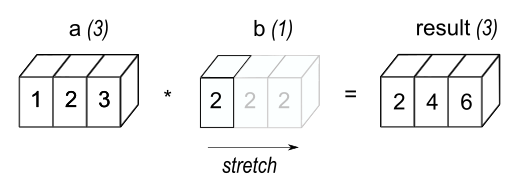

![image](https://numpy.org/doc/stable/_images/broadcasting_2.png)

In [ ]:
B = np.arange(1,5)
B * 10

In [ ]:
A = np.linspace(0, .7, 8).reshape(2,4)
A

In [ ]:
A + B

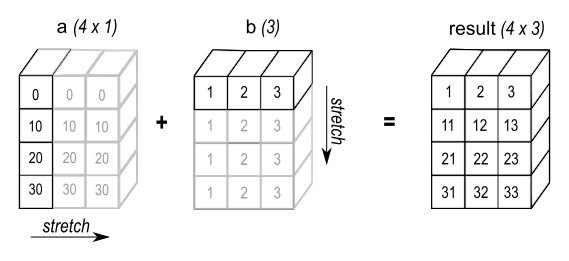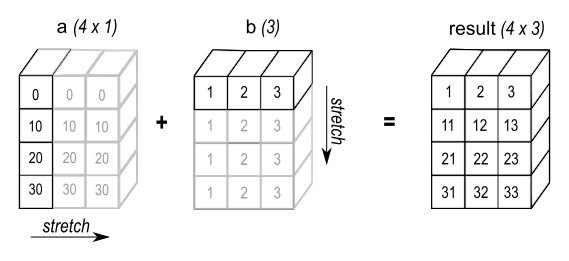

In [284]:
A = np.arange(1,5)
B = np.arange(1,4)
A, B

(array([1, 2, 3, 4]), array([1, 2, 3]))

In [285]:
A * 10

array([10, 20, 30, 40])

In [286]:
A * B

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [287]:
A[:,None].shape, B[:,None].shape

((4, 1), (3, 1))

In [288]:
A * B[:,None]

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12]])

In [291]:
A[None,:] * B

ValueError: operands could not be broadcast together with shapes (1,4) (3,) 

In [290]:
B[:,None]

array([[1],
       [2],
       [3]])

In [292]:
matrices = np.arange(4)[:,None,None] * np.diag([1,2])
print(matrices.shape)
matrices

(4, 2, 2)


array([[[0, 0],
        [0, 0]],

       [[1, 0],
        [0, 2]],

       [[2, 0],
        [0, 4]],

       [[3, 0],
        [0, 6]]])

In [293]:
vector = np.array([1,-1])
matrices * vector

array([[[ 0,  0],
        [ 0,  0]],

       [[ 1,  0],
        [ 0, -2]],

       [[ 2,  0],
        [ 0, -4]],

       [[ 3,  0],
        [ 0, -6]]])

In [294]:
matrices.shape, vector.shape

((4, 2, 2), (2,))

In [298]:
(matrices * vector).sum(-1)

array([[ 0,  0],
       [ 1, -2],
       [ 2, -4],
       [ 3, -6]])

In [299]:
matrices @ vector

array([[ 0,  0],
       [ 1, -2],
       [ 2, -4],
       [ 3, -6]])

In [301]:
np.tensordot(matrices, vector, (2,0))

array([[ 0,  0],
       [ 1, -2],
       [ 2, -4],
       [ 3, -6]])

## Array manipulation

[Array manipulation routines — NumPy v2.0 Manual](https://numpy.org/doc/stable/reference/routines.array-manipulation.html)

In [302]:
a = np.array([1, 2, 3, 4, 5, 6])
b = a[:2]
b += 10
a, b

(array([11, 12,  3,  4,  5,  6]), array([11, 12]))

In [304]:
a = np.array([1, 2, 3, 4, 5, 6])
b = a[:2].copy()
b += 10
a, b

(array([1, 2, 3, 4, 5, 6]), array([11, 12]))

In [305]:
A = np.arange(60).reshape([2,3,2,5])
A

array([[[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]],


       [[[30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]]])

In [307]:
A.shape, A.T.shape, A.transpose([1,0,3,2]).shape

((2, 3, 2, 5), (5, 2, 3, 2), (3, 2, 5, 2))

In [308]:
B = np.diag([1,2])
B.flatten()

array([1, 0, 0, 2])

In [309]:
B

array([[1, 0],
       [0, 2]])

In [310]:
np.tile(B, (2,3))

array([[1, 0, 1, 0, 1, 0],
       [0, 2, 0, 2, 0, 2],
       [1, 0, 1, 0, 1, 0],
       [0, 2, 0, 2, 0, 2]])

In [311]:
np.hstack([B, 2*B])

array([[1, 0, 2, 0],
       [0, 2, 0, 4]])

In [312]:
np.vstack([B, 2*B])

array([[1, 0],
       [0, 2],
       [2, 0],
       [0, 4]])

In [313]:
np.concatenate([B, B])

array([[1, 0],
       [0, 2],
       [1, 0],
       [0, 2]])

In [314]:
np.block([[B, 2*B], [3*B, 4*B]])

array([[1, 0, 2, 0],
       [0, 2, 0, 4],
       [3, 0, 4, 0],
       [0, 6, 0, 8]])

## Linear algebra

In [315]:
A = np.array([[1,2],[3,4]])
b = np.array([3,-1])
A @ b

array([1, 5])

In [316]:
vector = np.array([1,-1])
(matrices * vector).sum(-1)

array([[ 0,  0],
       [ 1, -2],
       [ 2, -4],
       [ 3, -6]])

In [317]:
matrices @ vector

array([[ 0,  0],
       [ 1, -2],
       [ 2, -4],
       [ 3, -6]])

In [318]:
np.tensordot(matrices, vector, (2,0))

array([[ 0,  0],
       [ 1, -2],
       [ 2, -4],
       [ 3, -6]])

In [319]:
np.linalg.eig(A)

EigResult(eigenvalues=array([-0.37228132,  5.37228132]), eigenvectors=array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))

In [320]:
vals, vecs = np.linalg.eig(A)
vals

array([-0.37228132,  5.37228132])

In [321]:
np.linalg.det(A)

-2.0000000000000004

In [322]:
import scipy.linalg as la

In [323]:
print(dir(np.linalg))

['LinAlgError', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_umath_linalg', 'cholesky', 'cond', 'det', 'eig', 'eigh', 'eigvals', 'eigvalsh', 'inv', 'linalg', 'lstsq', 'matrix_power', 'matrix_rank', 'multi_dot', 'norm', 'pinv', 'qr', 'slogdet', 'solve', 'svd', 'tensorinv', 'tensorsolve', 'test']


In [324]:
print(dir(la))

['LinAlgError', 'LinAlgWarning', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_basic', '_cythonized_array_utils', '_decomp', '_decomp_cholesky', '_decomp_cossin', '_decomp_ldl', '_decomp_lu', '_decomp_lu_cython', '_decomp_polar', '_decomp_qr', '_decomp_qz', '_decomp_schur', '_decomp_svd', '_decomp_update', '_expm_frechet', '_fblas', '_flapack', '_matfuncs', '_matfuncs_expm', '_matfuncs_sqrtm', '_matfuncs_sqrtm_triu', '_misc', '_procrustes', '_sketches', '_solve_toeplitz', '_solvers', '_special_matrices', 'bandwidth', 'basic', 'blas', 'block_diag', 'cdf2rdf', 'cho_factor', 'cho_solve', 'cho_solve_banded', 'cholesky', 'cholesky_banded', 'circulant', 'clarkson_woodruff_transform', 'companion', 'convolution_matrix', 'coshm', 'cosm', 'cossin', 'cython_blas', 'cython_lapack', 'decomp', 'decomp_cholesky', 'decomp_lu', 'decomp_qr', 'decomp_schur', 'decomp_svd', 'det', 'dft', 'diagsvd', 'eig', 'eig_banded', 'ei

In [325]:
la.expm(A)

array([[ 51.9689562 ,  74.73656457],
       [112.10484685, 164.07380305]])